In [15]:
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import mnist
keras.__version__

import matplotlib.pyplot as plt
from PIL import Image

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

5

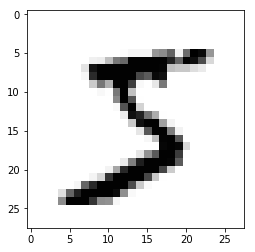

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(-1*train_images[0].reshape((28, 28)), cmap='Greys_r')
train_labels[0]

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
models_array = []
sizes = [5, 10, 20, 50, 100, 250, 500, 1000]
for s in sizes:
    network = models.Sequential()
    network.add(layers.Dense(s, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    models_array.append(network)

There's not even a need to specify optimizer parameters (learning rate, etc.) - cool

In [35]:
histories = []
for m in models_array:
    history = m.fit(train_images, train_labels, epochs=5, batch_size=128)
    histories.append(history)

Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 1.3121 - acc: 0.5453
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.7020 - acc: 0.7678
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5768 - acc: 0.8221
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.5256 - acc: 0.8424
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.4968 - acc: 0.8534
Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.6635 - acc: 0.8226
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3337 - acc: 0.9067
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2896 - acc: 0.9183
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2723 - acc: 0.9229
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2617 - acc: 0.9263
Epoch 1/5


In [36]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test set accuracy:", test_acc)

10000/10000 [==============================] - 1s 93us/step
test set accuracy: 0.98


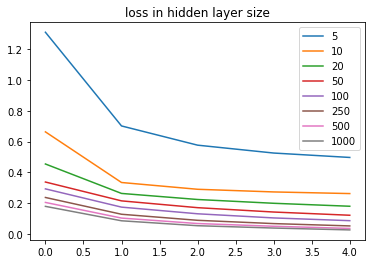

In [42]:
for idx, h in enumerate(histories):
    plt.plot(h.history['loss'], label=sizes[idx])
    
plt.legend(loc='upper right')
plt.title("loss in hidden layer size")
plt.show()

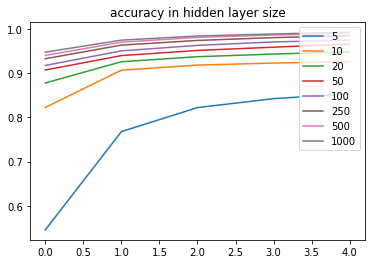

In [43]:
for idx, h in enumerate(histories):
    plt.plot(h.history['acc'], label=sizes[idx])
    
plt.legend(loc='upper right')
plt.title("accuracy in hidden layer size")
plt.show()